In [ ]:
YIELD FOR O2 uptake and CO2 excretion without dryweight

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
time = [0, 1.25, 2, 2.75, 3.5, 4.25, 5]

In [152]:
df_target=pd.read_csv(r'C:\Users\gosse\Desktop\reseach project/target-values-Gosse.csv',sep=';')
df_target['Time (h)']=df_target['Time (h) 2024-05-02T09.15.37.022']
df_target.drop(['Time (h) 2024-05-02T09.15.37.022'],axis=1,inplace=True)
df_target=df_target.set_index('Time (h)')
#df_target.drop((col for col in df_target.columns if not "OTR" in col or "CTR" in col),axis=1,inplace=True)
#df_target.dropna(axis=1,inplace=True)
df_target


,WT D1 OTR (mmol/L/h),WT D1 CTR (mmol/L/h),WT D1 integral OTR (mmol/L),WT D1 integral CTR (mmol/L),MT D2 OTR (mmol/L/h),MT D2 CTR (mmol/L/h),MT D2 integral OTR (mmol/L),MT D2 integral CTR (mmol/L),WTsample D3 OTR (mmol/L/h),WTsample D3 CTR (mmol/L/h),WTsample D3 integral OTR (mmol/L),WTsample D3 integral CTR (mmol/L),MTsample D4 OTR (mmol/L/h),MTsample D4 CTR (mmol/L/h),MTsample D4 integral OTR (mmol/L),MTsample D4 integral CTR (mmol/L)
Time (h),,,,,,,,,,,,,,,,
0.50144,1.835881,0.248477,0.917941,0.124239,1.838807,0.166839,0.919404,0.083419,1.592179,0.202132,0.796090,0.101066,-0.504257,0.155281,-0.252129,0.077641
1.00287,0.629395,0.295952,1.232638,0.272214,0.810777,0.193604,1.324792,0.180221,0.582217,0.229879,1.087198,0.216005,0.612480,0.193618,0.054111,0.174450
1.50291,0.932373,0.361136,1.698825,0.452782,0.872802,0.240251,1.761193,0.300347,11.760652,0.489464,6.967524,0.460737,3.453096,0.041735,1.780659,0.195317
2.00436,0.272703,0.420697,1.835177,0.663131,0.276304,0.279681,1.899345,0.440187,0.490455,0.423011,7.212752,0.672243,1.109371,0.270992,2.335345,0.330813
2.50441,0.683809,0.491398,2.177081,0.908830,0.712621,0.324586,2.255655,0.602480,52.885879,29.647280,33.655691,15.495882,3.477111,2.656901,4.073900,1.659263
3.00586,0.399856,0.589698,2.377009,1.203679,0.090574,0.398213,2.300942,0.801586,0.346679,0.580669,33.829031,15.786217,0.051502,0.368143,4.099651,1.843335
3.50591,0.198867,0.697104,2.476443,1.552231,0.317345,0.482313,2.459615,1.042743,0.589701,0.655431,34.123881,16.113933,2.202885,0.443887,5.201094,2.065278
4.00598,1.478161,0.887075,3.215523,1.995769,1.576742,0.614644,3.247986,1.350065,8.543628,1.382409,38.395695,16.805137,4.659766,3.403944,7.530977,3.767251
4.50743,0.132373,0.981806,3.281710,2.486672,0.152332,0.686883,3.324152,1.693507,0.250855,0.532150,38.521122,17.071213,0.476065,0.943891,7.769009,4.239196


In [153]:
df_target_OTR=df_target[[col for col in df_target.columns if "OTR" in col]].copy()
#df_target_OTR.drop((col for col in df_target_OTR.columns if not "integral" in col), axis = 1, inplace=True)
#df_target_OTR.dropna(axis=0,inplace=True)
df_target_OTR
time= [0, 1.25, 2, 2.75, 3.5, 4.25, 5]
threshold = 0.2
# Remove close timepoints
filtered_time = [t2 for t2 in df_target_OTR.index if all(abs(t2 - t1) >= threshold for t1 in time)]
df_target_OTR=df_target_OTR.loc[filtered_time].copy()
df_target_OTR
df_target_CTR=df_target[[col for col in df_target.columns if "CTR" in col]].copy()
#df_target_CTR.drop((col for col in df_target_CTR.columns if not "integral" in col), axis = 1, inplace=True)
#df_target_OTR.dropna(axis=0,inplace=True)
df_target_CTR
time= [0, 1.25, 2, 2.75, 3.5, 4.25, 5]
threshold = 0.2
# Remove close timepoints
filtered_time = [t2 for t2 in df_target_CTR.index if all(abs(t2 - t1) >= threshold for t1 in time)]
df_target_CTR=df_target_CTR.loc[filtered_time].copy()
df_target_CTR

,WT D1 CTR (mmol/L/h),WT D1 integral CTR (mmol/L),MT D2 CTR (mmol/L/h),MT D2 integral CTR (mmol/L),WTsample D3 CTR (mmol/L/h),WTsample D3 integral CTR (mmol/L),MTsample D4 CTR (mmol/L/h),MTsample D4 integral CTR (mmol/L)
Time (h),,,,,,,,
0.50144,0.248477,0.124239,0.166839,0.083419,0.202132,0.101066,0.155281,0.077641
1.00287,0.295952,0.272214,0.193604,0.180221,0.229879,0.216005,0.193618,0.174450
1.50291,0.361136,0.452782,0.240251,0.300347,0.489464,0.460737,0.041735,0.195317
2.50441,0.491398,0.908830,0.324586,0.602480,29.647280,15.495882,2.656901,1.659263
3.00586,0.589698,1.203679,0.398213,0.801586,0.580669,15.786217,0.368143,1.843335
4.00598,0.887075,1.995769,0.614644,1.350065,1.382409,16.805137,3.403944,3.767251
4.50743,0.981806,2.486672,0.686883,1.693507,0.532150,17.071213,0.943891,4.239196
5.50898,1.426693,3.802615,1.029008,2.619021,-0.015604,17.593274,-0.038130,4.566740


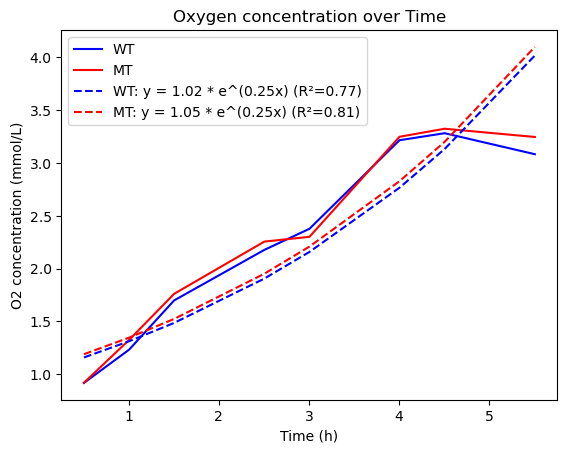

In [154]:
def deltaS(type):
    first_point = type.iloc[0]
    last_point = type.iloc[-1]
    return first_point, last_point
df_target_OTR['Time (h)'] = df_target_OTR.index
# Calculate deltaS for WT and MT
WT_S_first, WT_S_last = deltaS(df_target_OTR['WT D1 integral OTR (mmol/L)'])
MT_S_first, MT_S_last = deltaS(df_target_OTR['MT D2 integral OTR (mmol/L)'])

# Plot the data
plt.plot(df_target_OTR['Time (h)'], df_target_OTR['WT D1 integral OTR (mmol/L)'], label='WT', color='blue')
plt.plot(df_target_OTR['Time (h)'], df_target_OTR['MT D2 integral OTR (mmol/L)'], label='MT', color='red')

# Perform exponential regression for WT
log_WT = np.log(df_target_OTR['WT D1 integral OTR (mmol/L)'])
slope_WT, intercept_WT = np.polyfit(df_target_OTR['Time (h)'], log_WT, 1)
a_WT = np.exp(intercept_WT)
b_WT = slope_WT
exp_line_WT = a_WT * np.exp(b_WT * df_target_OTR['Time (h)'])
r2_WT = r2_score(df_target_OTR['WT D1 integral OTR (mmol/L)'], exp_line_WT)
WT_formula = f'WT: y = {a_WT:.2f} * e^({b_WT:.2f}x) (R²={r2_WT:.2f})'
plt.plot(df_target_OTR['Time (h)'], exp_line_WT, color='blue', linestyle='--', label=WT_formula)

# Perform exponential regression for MT
log_MT = np.log(df_target_OTR['MT D2 integral OTR (mmol/L)'])
slope_MT, intercept_MT = np.polyfit(df_target_OTR['Time (h)'], log_MT, 1)
a_MT = np.exp(intercept_MT)
b_MT = slope_MT
exp_line_MT = a_MT * np.exp(b_MT * df_target_OTR['Time (h)'])
r2_MT = r2_score(df_target_OTR['MT D2 integral OTR (mmol/L)'], exp_line_MT)
MT_formula = f'MT: y = {a_MT:.2f} * e^({b_MT:.2f}x) (R²={r2_MT:.2f})'
plt.plot(df_target_OTR['Time (h)'], exp_line_MT, color='red', linestyle='--', label=MT_formula)

# Label the plot
plt.xlabel('Time (h)')
plt.ylabel('O2 concentration (mmol/L)')
plt.title('Oxygen concentration over Time')
plt.legend(loc='upper left')
plt.show()

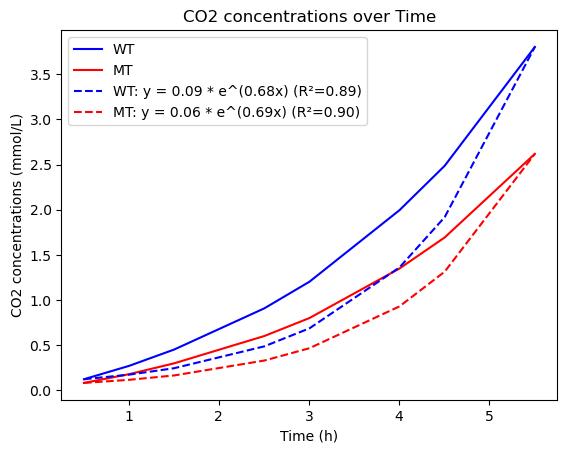

In [155]:
def deltaS(type):
    first_point = type.iloc[0]
    last_point = type.iloc[-1]
    return first_point, last_point

# Assuming df_target_CTR is defined and has the required data
df_target_CTR['Time (h)'] = df_target_CTR.index

# Calculate deltaS for WT and MT
WT_S_first, WT_S_last = deltaS(df_target_CTR['WT D1 integral CTR (mmol/L)'])
MT_S_first, MT_S_last = deltaS(df_target_CTR['MT D2 integral CTR (mmol/L)'])

# Plot the data
plt.plot(df_target_CTR['Time (h)'], df_target_CTR['WT D1 integral CTR (mmol/L)'], label='WT', color='blue')
plt.plot(df_target_CTR['Time (h)'], df_target_CTR['MT D2 integral CTR (mmol/L)'], label='MT', color='red')

# Perform exponential regression for WT
time = df_target_CTR['Time (h)']
log_WT_S_first = np.log(WT_S_first)
log_WT_S_last = np.log(WT_S_last)
slope_WT = (log_WT_S_last - log_WT_S_first) / (time.iloc[-1] - time.iloc[0])
intercept_WT = log_WT_S_first - slope_WT * time.iloc[0]
a_WT = np.exp(intercept_WT)
b_WT = slope_WT
exp_line_WT = a_WT * np.exp(b_WT * time)
r2_WT = r2_score(df_target_CTR['WT D1 integral CTR (mmol/L)'], exp_line_WT)
WT_formula = f'WT: y = {a_WT:.2f} * e^({b_WT:.2f}x) (R²={r2_WT:.2f})'
plt.plot(time, exp_line_WT, color='blue', linestyle='--', label=WT_formula)

# Perform exponential regression for MT
log_MT_S_first = np.log(MT_S_first)
log_MT_S_last = np.log(MT_S_last)
slope_MT = (log_MT_S_last - log_MT_S_first) / (time.iloc[-1] - time.iloc[0])
intercept_MT = log_MT_S_first - slope_MT * time.iloc[0]
a_MT = np.exp(intercept_MT)
b_MT = slope_MT
exp_line_MT = a_MT * np.exp(b_MT * time)
r2_MT = r2_score(df_target_CTR['MT D2 integral CTR (mmol/L)'], exp_line_MT)
MT_formula = f'MT: y = {a_MT:.2f} * e^({b_MT:.2f}x) (R²={r2_MT:.2f})'
plt.plot(time, exp_line_MT, color='red', linestyle='--', label=MT_formula)

# Label the plot
plt.xlabel('Time (h)')
plt.ylabel('CO2 concentrations (mmol/L)')
plt.title('CO2 concentrations over Time')
plt.legend(loc='upper left')
plt.show()

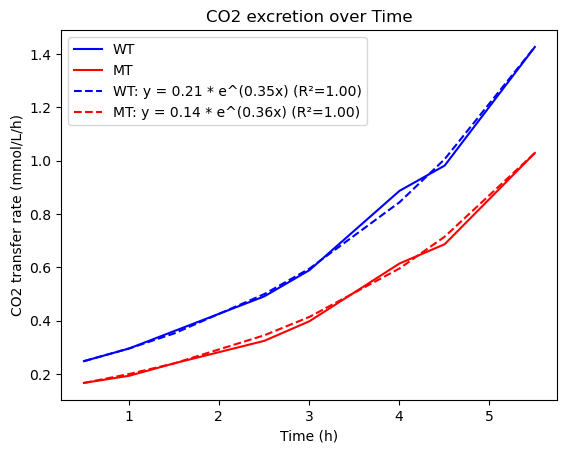

In [156]:
def deltaS(type):
    first_point = type.iloc[0]
    last_point = type.iloc[-1]
    return first_point, last_point

# Assuming df_target_CTR is defined and has the required data
df_target_CTR['Time (h)'] = df_target_CTR.index

# Calculate deltaS for WT and MT
WT_S_first, WT_S_last = deltaS(df_target_CTR['WT D1 CTR (mmol/L/h)'])
MT_S_first, MT_S_last = deltaS(df_target_CTR['MT D2 CTR (mmol/L/h)'])

# Plot the data
plt.plot(df_target_CTR['Time (h)'], df_target_CTR['WT D1 CTR (mmol/L/h)'], label='WT', color='blue')
plt.plot(df_target_CTR['Time (h)'], df_target_CTR['MT D2 CTR (mmol/L/h)'], label='MT', color='red')

# Perform exponential regression for WT
time = df_target_CTR['Time (h)']
log_WT_S_first = np.log(WT_S_first)
log_WT_S_last = np.log(WT_S_last)
slope_WT = (log_WT_S_last - log_WT_S_first) / (time.iloc[-1] - time.iloc[0])
intercept_WT = log_WT_S_first - slope_WT * time.iloc[0]
a_WT = np.exp(intercept_WT)
b_WT = slope_WT
exp_line_WT = a_WT * np.exp(b_WT * time)
r2_WT = r2_score(df_target_CTR['WT D1 CTR (mmol/L/h)'], exp_line_WT)
WT_formula = f'WT: y = {a_WT:.2f} * e^({b_WT:.2f}x) (R²={r2_WT:.2f})'
plt.plot(time, exp_line_WT, color='blue', linestyle='--', label=WT_formula)

# Perform exponential regression for MT
log_MT_S_first = np.log(MT_S_first)
log_MT_S_last = np.log(MT_S_last)
slope_MT = (log_MT_S_last - log_MT_S_first) / (time.iloc[-1] - time.iloc[0])
intercept_MT = log_MT_S_first - slope_MT * time.iloc[0]
a_MT = np.exp(intercept_MT)
b_MT = slope_MT
exp_line_MT = a_MT * np.exp(b_MT * time)
r2_MT = r2_score(df_target_CTR['MT D2 CTR (mmol/L/h)'], exp_line_MT)
MT_formula = f'MT: y = {a_MT:.2f} * e^({b_MT:.2f}x) (R²={r2_MT:.2f})'
plt.plot(time, exp_line_MT, color='red', linestyle='--', label=MT_formula)

# Label the plot
plt.xlabel('Time (h)')
plt.ylabel('CO2 transfer rate (mmol/L/h)')
plt.title('CO2 excretion over Time')
plt.legend(loc='upper left')
plt.show()

1.53 1.28


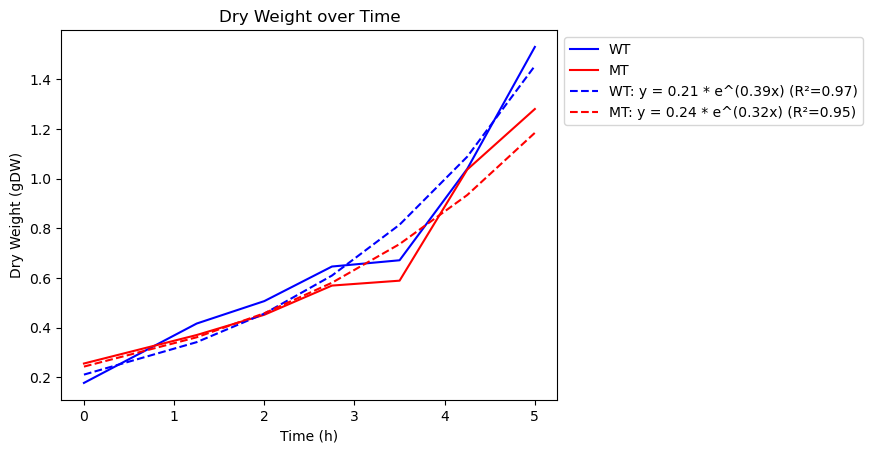

In [160]:
growthrates = {'WT': 0.306, 'MT': 0.256}

# Function to calculate dX (growth over time)
def calculate_dX(type, growthrate):
    growth = growthrate[type]
    dX = growth * 5
    return dX
time = [0, 1.25, 2, 2.75, 3.5, 4.25, 5]
# Assuming `time` is already defined
WT_dX = calculate_dX('WT', growthrates)
MT_dX = calculate_dX('MT', growthrates)
print(WT_dX, MT_dX)

# Load cell count data
cellcount = pd.read_csv(r'C:\Users\gosse\Desktop\reseach project\cellcounts_TOM1.csv', sep=';')

# Function to calculate weight per cell
def calculate_weightpercell(type, dryweight, cellcount):
    cells = cellcount[type].iloc[-1]  # Total cell count at the last time point
    weight_per_cell = dryweight / cells 
    points = []
    for x in cellcount[type]:
        weight = x * weight_per_cell
        points.append(weight)
    return points

# Calculate weight per cell over time
WT_weightdata = calculate_weightpercell('WT', WT_dX, cellcount)
MT_weightdata = calculate_weightpercell('MT', MT_dX, cellcount)

# Plot the weight per cell over time
plt.plot(time, WT_weightdata, color='blue', label='WT')
plt.plot(time, MT_weightdata, color='red', label='MT')

# Convert time to numpy array for calculations
time_np = np.array(time)

# Perform exponential regression for WT
log_WT_weightdata = np.log(WT_weightdata)
slope_WT, intercept_WT = np.polyfit(time_np, log_WT_weightdata, 1)
a_WT = np.exp(intercept_WT)
b_WT = slope_WT
exp_line_WT = a_WT * np.exp(b_WT * time_np)
r2_WT = r2_score(WT_weightdata, exp_line_WT)
WT_formula = f'WT: y = {a_WT:.2f} * e^({b_WT:.2f}x) (R²={r2_WT:.2f})'
plt.plot(time, exp_line_WT, color='blue', linestyle='--', label=WT_formula)

# Perform exponential regression for MT
log_MT_weightdata = np.log(MT_weightdata)
slope_MT, intercept_MT = np.polyfit(time_np, log_MT_weightdata, 1)
a_MT = np.exp(intercept_MT)
b_MT = slope_MT
exp_line_MT = a_MT * np.exp(b_MT * time_np)
r2_MT = r2_score(MT_weightdata, exp_line_MT)
MT_formula = f'MT: y = {a_MT:.2f} * e^({b_MT:.2f}x) (R²={r2_MT:.2f})'
plt.plot(time, exp_line_MT, color='red', linestyle='--', label=MT_formula)

# Label the plot
plt.xlabel('Time (h)')
plt.ylabel('Dry Weight (gDW)')
plt.title('Dry Weight over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

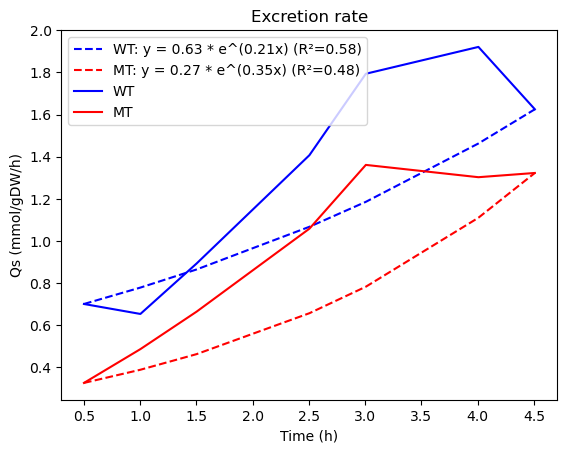

In [162]:
def deltaS(data):
    first_point = data[0]
    last_point = data[-1]  # Exclude the last point
    return first_point, last_point

# Assuming df_target_CTR, WT_weightdata, and MT_weightdata are already defined

time = df_target_CTR['Time (h)'].values[:-1]  # Adjusted to exclude the last point

# Adjusted lengths to exclude the last point
WT_S_first, WT_S_last = deltaS(df_target_CTR['WT D1 integral CTR (mmol/L)'].values[:-1] / WT_weightdata)
MT_S_first, MT_S_last = deltaS(df_target_CTR['MT D2 integral CTR (mmol/L)'].values[:-1] / MT_weightdata)

# Calculate Qs in g/gDW/h
WT_Qs = df_target_CTR['WT D1 integral CTR (mmol/L)'].values[:-1] / WT_weightdata
MT_Qs = df_target_CTR['MT D2 integral CTR (mmol/L)'].values[:-1] / MT_weightdata

# Perform exponential regression for WT
log_WT_S_first = np.log(WT_Qs[0])
log_WT_S_last = np.log(WT_Qs[-1])
slope_WT = (log_WT_S_last - log_WT_S_first) / (time[-1] - time[0])
intercept_WT = log_WT_S_first - slope_WT * time[0]
a_WT = np.exp(intercept_WT)
b_WT = slope_WT
exp_line_WT = a_WT * np.exp(b_WT * time)
r2_WT = r2_score(WT_Qs, exp_line_WT)
WT_formula = f'WT: y = {a_WT:.2f} * e^({b_WT:.2f}x) (R²={r2_WT:.2f})'
plt.plot(time, exp_line_WT, color='blue', linestyle='--', label=WT_formula)

# Perform exponential regression for MT
log_MT_S_first = np.log(MT_Qs[0])
log_MT_S_last = np.log(MT_Qs[-1])
slope_MT = (log_MT_S_last - log_MT_S_first) / (time[-1] - time[0])
intercept_MT = log_MT_S_first - slope_MT * time[0]
a_MT = np.exp(intercept_MT)
b_MT = slope_MT
exp_line_MT = a_MT * np.exp(b_MT * time)
r2_MT = r2_score(MT_Qs, exp_line_MT)
MT_formula = f'MT: y = {a_MT:.2f} * e^({b_MT:.2f}x) (R²={r2_MT:.2f})'
plt.plot(time, exp_line_MT, color='red', linestyle='--', label=MT_formula)

# Plot the data
plt.plot(time, WT_Qs, color='blue', label='WT')
plt.plot(time, MT_Qs, color='red', label='MT')

plt.xlabel('Time (h)')
plt.ylabel('Qs (mmol/gDW/h)')
plt.title('Excretion rate')
plt.legend()
plt.show()

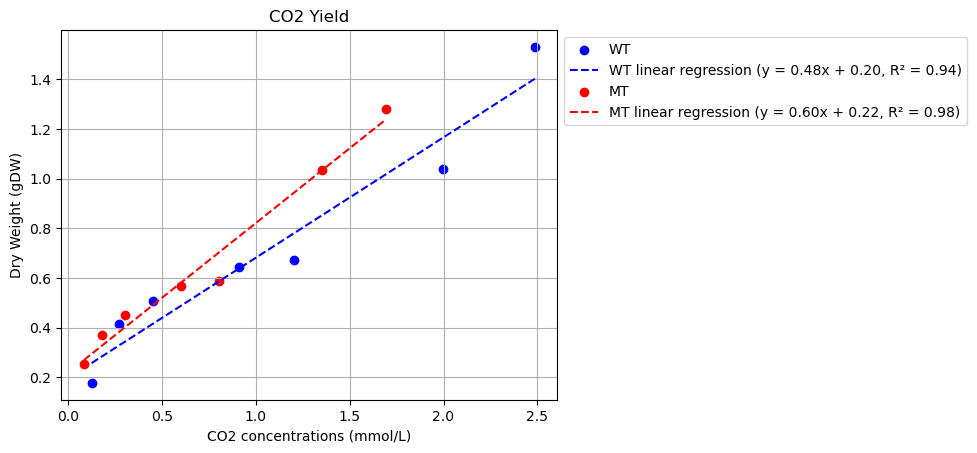

In [145]:
plt.scatter(df_target_CTR['WT D1 integral CTR (mmol/L)'].iloc[:-1], WT_weightdata, color='blue', marker='o', label='WT')

# Perform linear regression for WT data
slope_WT, intercept_WT = np.polyfit(df_target_CTR['WT D1 integral CTR (mmol/L)'].iloc[:-1], WT_weightdata, 1)

# Calculate R-squared value for WT data
residuals_WT = WT_weightdata - (slope_WT * df_target_CTR['WT D1 integral CTR (mmol/L)'].iloc[:-1] + intercept_WT)
ss_res_WT = np.sum(np.square(residuals_WT))
ss_tot_WT = np.sum(np.square(WT_weightdata - np.mean(WT_weightdata)))
r_squared_WT = 1 - (ss_res_WT / ss_tot_WT)

# Plot the regression line for WT data
plt.plot(df_target_CTR['WT D1 integral CTR (mmol/L)'].iloc[:-1], slope_WT * df_target_CTR['WT D1 integral CTR (mmol/L)'].iloc[:-1] + intercept_WT, color='blue', linestyle='--', label=f'WT linear regression (y = {slope_WT:.2f}x + {intercept_WT:.2f}, R² = {r_squared_WT:.2f})')

# Scatter plot for MT data
plt.scatter(df_target_CTR['MT D2 integral CTR (mmol/L)'].iloc[:-1], MT_weightdata, color='red', marker='o', label='MT')

# Perform linear regression for MT data
slope_MT, intercept_MT = np.polyfit(df_target_CTR['MT D2 integral CTR (mmol/L)'].iloc[:-1], MT_weightdata, 1)

# Calculate R-squared value for MT data
residuals_MT = MT_weightdata - (slope_MT * df_target_CTR['MT D2 integral CTR (mmol/L)'].iloc[:-1] + intercept_MT)
ss_res_MT = np.sum(np.square(residuals_MT))
ss_tot_MT = np.sum(np.square(MT_weightdata - np.mean(MT_weightdata)))
r_squared_MT = 1 - (ss_res_MT / ss_tot_MT)

# Plot the regression line for MT data
plt.plot(df_target_CTR['MT D2 integral CTR (mmol/L)'].iloc[:-1], slope_MT * df_target_CTR['MT D2 integral CTR (mmol/L)'].iloc[:-1] + intercept_MT, color='red', linestyle='--', label=f'MT linear regression (y = {slope_MT:.2f}x + {intercept_MT:.2f}, R² = {r_squared_MT:.2f})')

# Place the legend outside the graph
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Labels and title
plt.xlabel('CO2 concentrations (mmol/L)')
plt.ylabel('Dry Weight (gDW)')
plt.title('CO2 Yield')
plt.grid(True)
plt.show()